In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [7]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
data.head()

C:\Users\Julian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [152]:
out = ['OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'REPORTNO', 
       'STATUS', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'INCDATE',
       'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY']

for column in data[out].columns.values.tolist():
    print(column)
    print(data[column].unique())
    print("")

OBJECTID
[     1      2      3 ... 219545 219546 219547]

INCKEY
[  1307  52200  26700 ... 311280 309514 308220]

COLDETKEY
[  1307  52200  26700 ... 312640 310794 309500]

INTKEY
[37475.    nan 34387. ... 36056. 38057. 26005.]

REPORTNO
['3502005' '2607959' '1482393' ... '3809984' '3810083' 'E868008']

STATUS
['Matched' 'Unmatched']

LOCATION
['5TH AVE NE AND NE 103RD ST' 'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N'
 '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST' ...
 '47TH AVE SW AND SW 98TH ST' 'NE PARK RD AND NE RAVENNA WB BV'
 'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1']

EXCEPTRSNCODE
[' ' nan 'NEI']

EXCEPTRSNDESC
[nan 'Not Enough Information, or Insufficient Location Information']

SEVERITYCODE.1
[2 1]

SEVERITYDESC
['Injury Collision' 'Property Damage Only Collision']

COLLISIONTYPE
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']

PERSONCOUNT
[ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 

In [153]:
df = data.drop(out, axis = 1)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,0,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,-122.347294,47.647172,Block,0,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,-122.334540,47.607871,Block,0,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,-122.334803,47.604803,Block,0,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,-122.306426,47.545739,Intersection,0,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


In [154]:
df.describe(include = 'all')
#df.describe()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,192747,194673.000000,194673.000000,194673,188344,194673.000000,29805,189789,189592,189661,189503,4667,9333,194655,194673
unique,NaN,NaN,NaN,3,NaN,NaN,162058,7,NaN,1,4,11,9,9,1,1,115,2
top,NaN,NaN,NaN,Block,NaN,NaN,11/2/2006,Mid-Block (not related to intersection),NaN,Y,N,Clear,Dry,Daylight,Y,Y,32,N
freq,NaN,NaN,NaN,126926,NaN,NaN,96,89800,NaN,29805,100274,111135,124510,116137,4667,9333,27612,187457
mean,1.298901,-122.330518,47.619543,NaN,0.037139,0.028391,NaN,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457778,0.029976,0.056157,NaN,0.198150,0.167413,NaN,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-122.419091,47.495573,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,-122.348673,47.575956,NaN,0.000000,0.000000,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,-122.330224,47.615369,NaN,0.000000,0.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,-122.311937,47.663664,NaN,0.000000,0.000000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df['X'].replace(np.nan, df['X'].mean(), inplace = True)
df['Y'].replace(np.nan, df['Y'].mean(), inplace = True)
df['ADDRTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['JUNCTIONTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace(['N', '0'], 0, inplace = True)
df['UNDERINFL'].replace(['Y', '1'], 1, inplace = True)
df['WEATHER'].replace(np.nan, 'Unknown', inplace = True)
df['ROADCOND'].replace(np.nan, 'Unknown', inplace = True)
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOURDAY'] = df['INCDTTM'].dt.hour
df['DAYWEEK'] = df['INCDTTM'].dt.dayofweek
df['MONTH'] = df['INCDTTM'].dt.month
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace(['N', '0'], 0, inplace = True)
df['HITPARKEDCAR'].replace(['Y', '1'], 1, inplace = True)

nan = df.isnull()
for column in nan.columns.values.tolist():
    print(column)
    print(nan[column].value_counts())
    print("")    
    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

ST_COLCODE
False    194655
True         18
Name: ST_COLCODE, dtype: int64

HITPARKEDCAR
False   

In [156]:
#df.drop('INCDTTM', axis = 1, inplace = True)

In [157]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

SEVERITYCODE
[2 1]

X
[-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]

Y
[47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]

ADDRTYPE
['Intersection' 'Block' 'Alley' 'Unknown']

PEDCOUNT
[0 1 2 3 4 5 6]

PEDCYLCOUNT
[0 1 2]

INCDTTM
['2013-03-27T14:54:00.000000000' '2006-12-20T18:55:00.000000000'
 '2004-11-18T10:20:00.000000000' ... '2019-01-19T09:25:00.000000000'
 '2019-01-15T16:48:00.000000000' '2018-11-30T15:45:00.000000000']

JUNCTIONTYPE
['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' 'Unknown'
 'Ramp Junction']

SDOT_COLCODE
[11 16 14 51 13 26 28 18 34  0 24 69 12 21 23 29 27 48 15 55 33 56 54 31
 44 32 25 66 36 64 22 58 47 61 35 53 46 68 52]

INATTENTIONIND
[0 1]

UNDERINFL
[0 1]

WEATHER
['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Slee

In [158]:
df_test = df.groupby(['SEVERITYCODE'])['HOURDAY'].value_counts()

In [159]:
df_sev2 = df[df['SEVERITYCODE'] == 2]
df_sev1 = df[df['SEVERITYCODE'] == 1]
df_sev2.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,HOURDAY,DAYWEEK,MONTH
0,2,-122.323148,47.703140,Intersection,0,0,2013-03-27 14:54:00,At Intersection (intersection related),11,0,...,Overcast,Wet,Daylight,0,0,10,0,14,2,3
4,2,-122.306426,47.545739,Intersection,0,0,2004-01-28 08:04:00,At Intersection (intersection related),11,0,...,Raining,Wet,Daylight,0,0,10,0,8,2,1
7,2,-122.320780,47.614076,Intersection,0,1,2020-04-15 17:47:00,At Intersection (intersection related),51,0,...,Clear,Dry,Daylight,0,0,5,0,17,2,4
9,2,-122.384700,47.528475,Intersection,0,0,2006-03-20 15:49:00,At Intersection (intersection related),11,0,...,Clear,Dry,Daylight,0,0,10,0,15,0,3
14,2,-122.317414,47.664028,Block,0,0,2013-03-31 02:09:00,Mid-Block (not related to intersection),11,0,...,Clear,Dry,Dark - Street Lights On,0,0,30,0,2,6,3


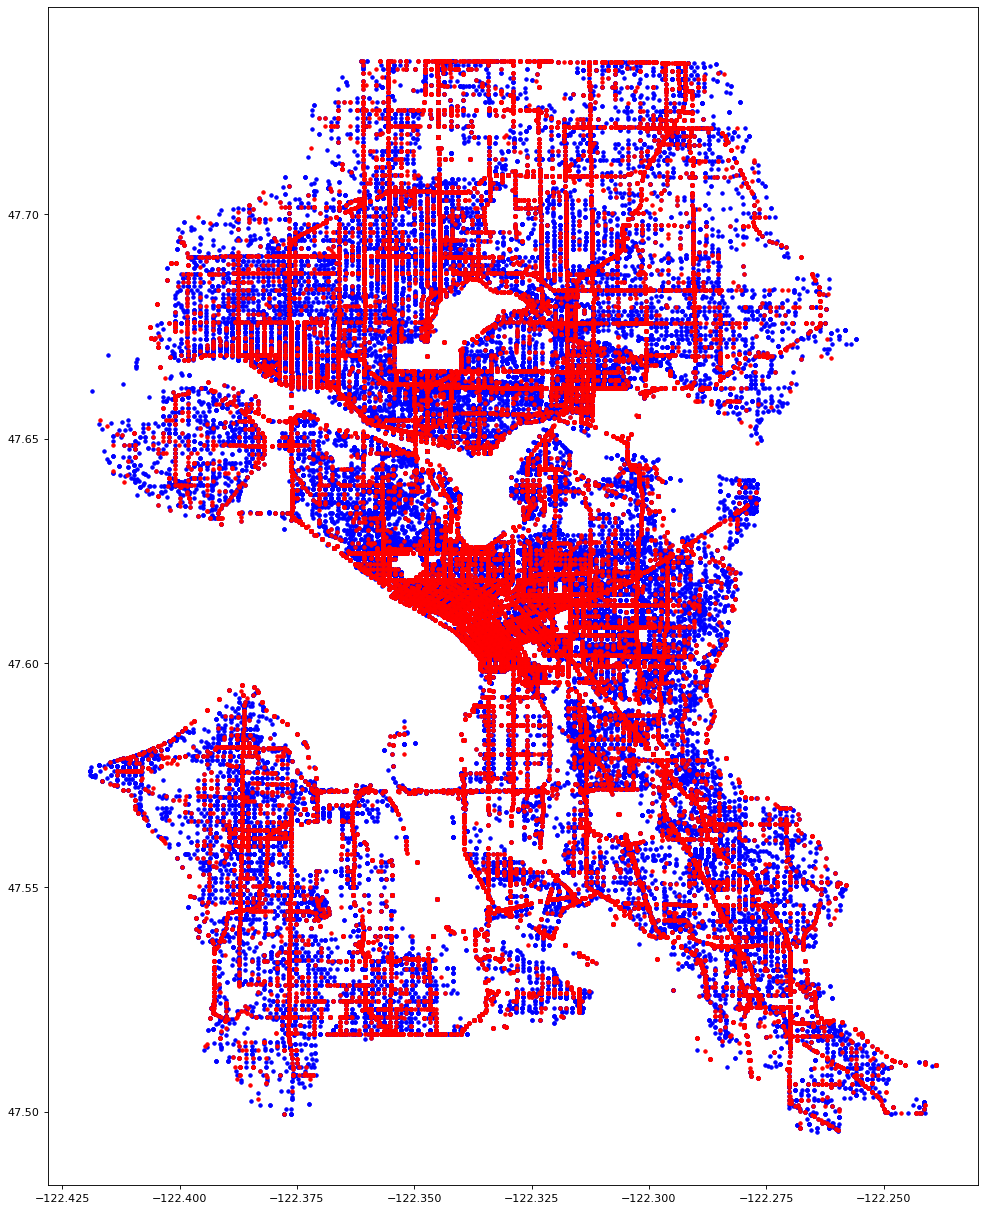

In [180]:
fs = 15
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b')
plt.scatter(df_sev2['X'], df_sev2['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-181-f4ac08ded080>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spe1 = df_sev2[df['SPEEDING'] == 1]


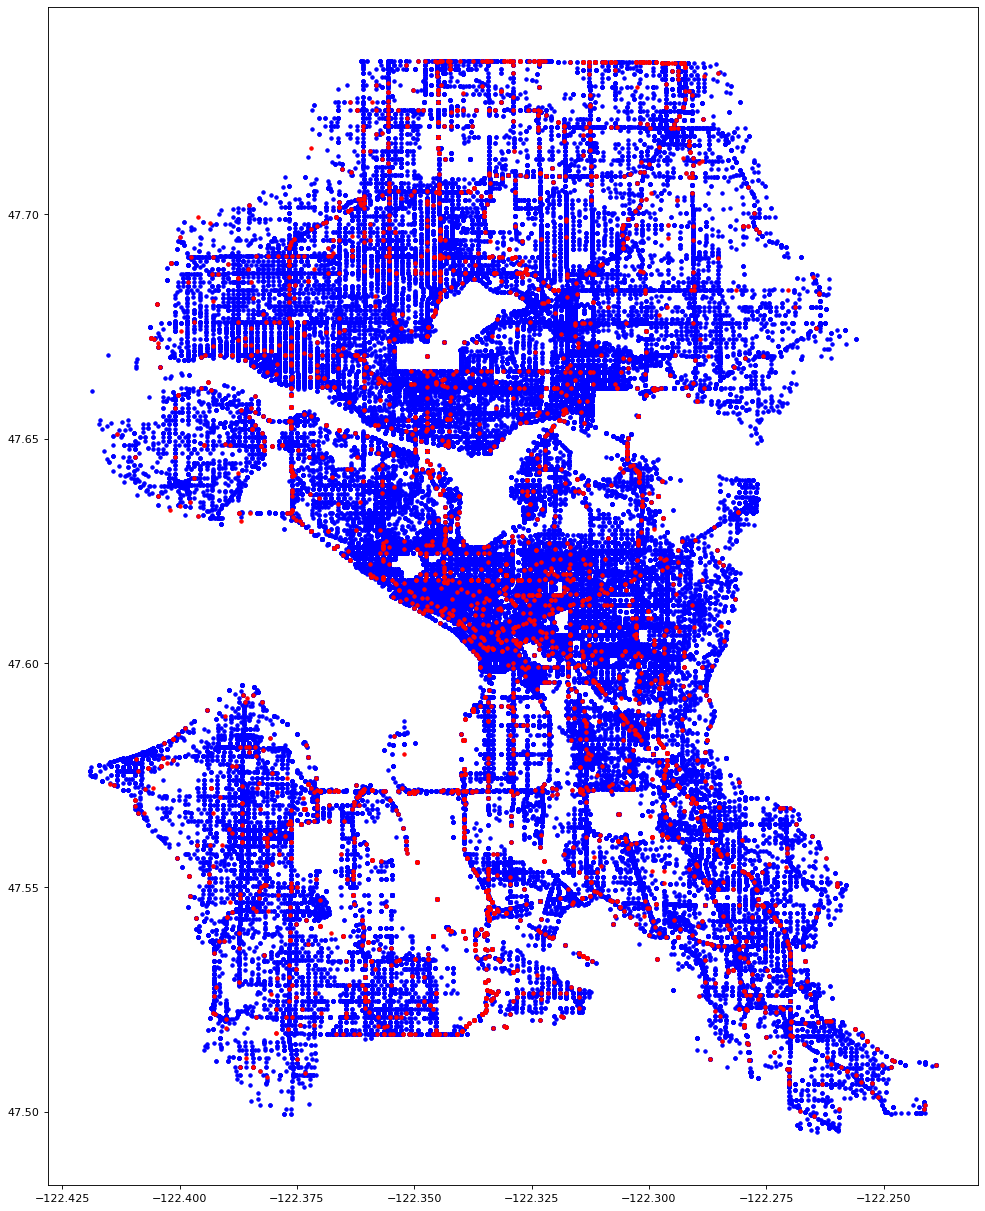

In [181]:
df_spe1 = df_sev2[df['SPEEDING'] == 1]
df_spe0 = df[df['SPEEDING'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_spe0['X'], df_spe0['Y'], marker='.', color = 'b')
plt.scatter(df_spe1['X'], df_spe1['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-182-67c2cfbf473c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_uin1 = df_sev2[df['UNDERINFL'] == 1]


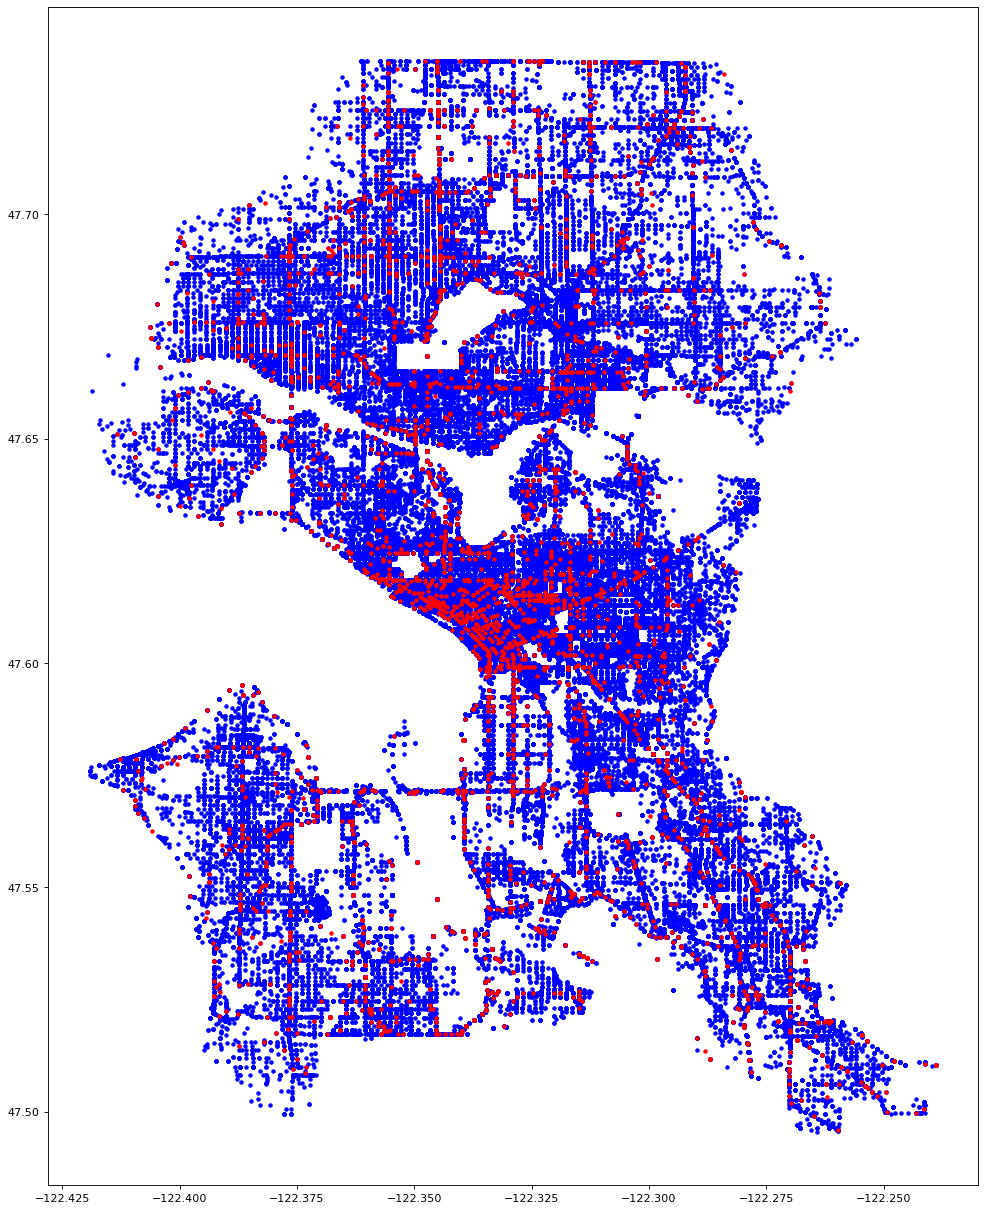

In [182]:
df_uin1 = df_sev2[df['UNDERINFL'] == 1]
df_uin0 = df[df['UNDERINFL'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_uin0['X'], df_uin0['Y'], marker='.', color = 'b')
plt.scatter(df_uin1['X'], df_uin1['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-183-480ab13bc114>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iat1 = df_sev2[df['INATTENTIONIND'] == 1]


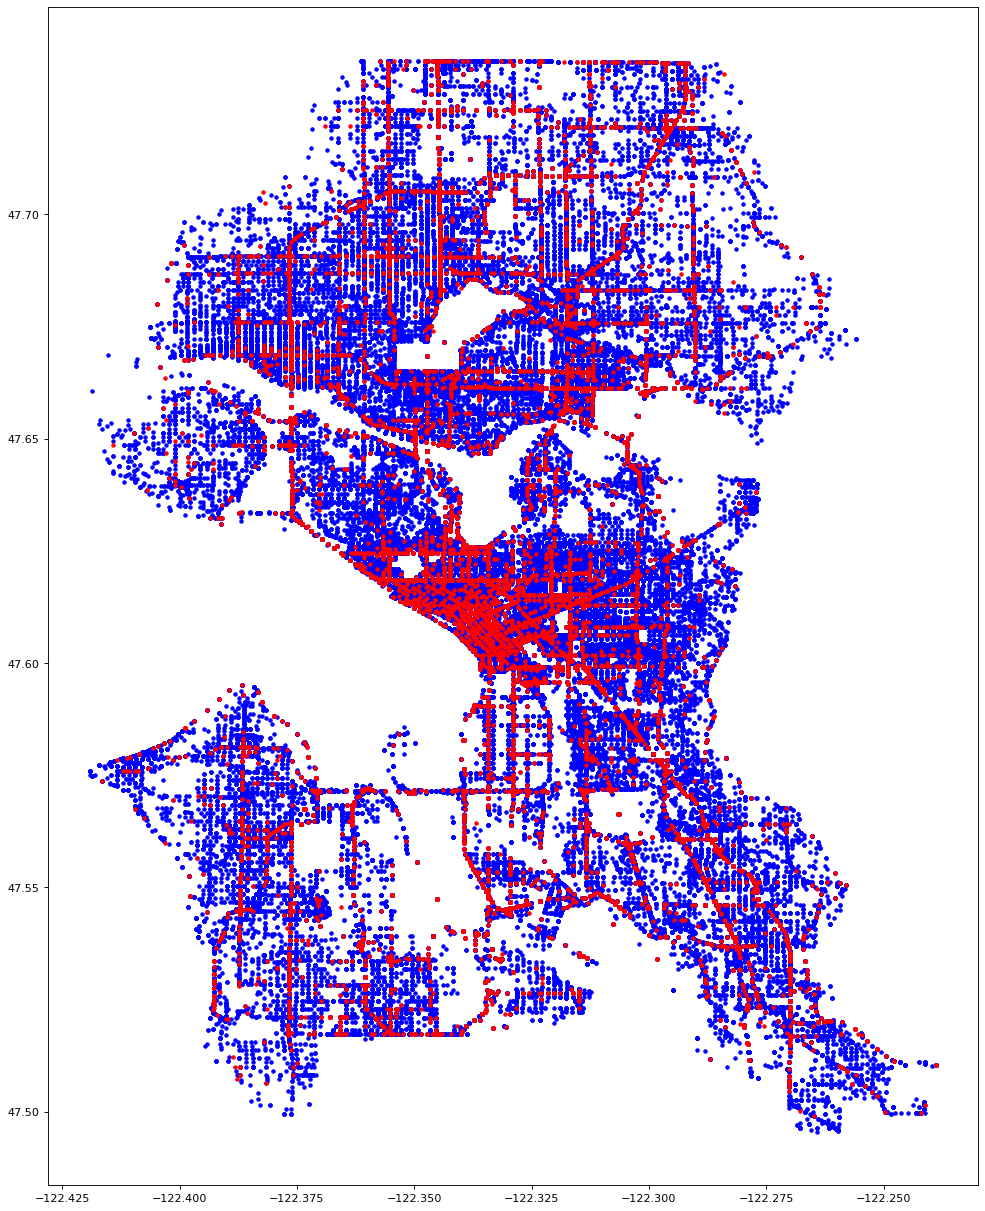

In [183]:
df_iat1 = df_sev2[df['INATTENTIONIND'] == 1]
df_iat0 = df[df['INATTENTIONIND'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_iat0['X'], df_iat0['Y'], marker='.', color = 'b')
plt.scatter(df_iat1['X'], df_iat1['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-184-8ee9816d0257>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]


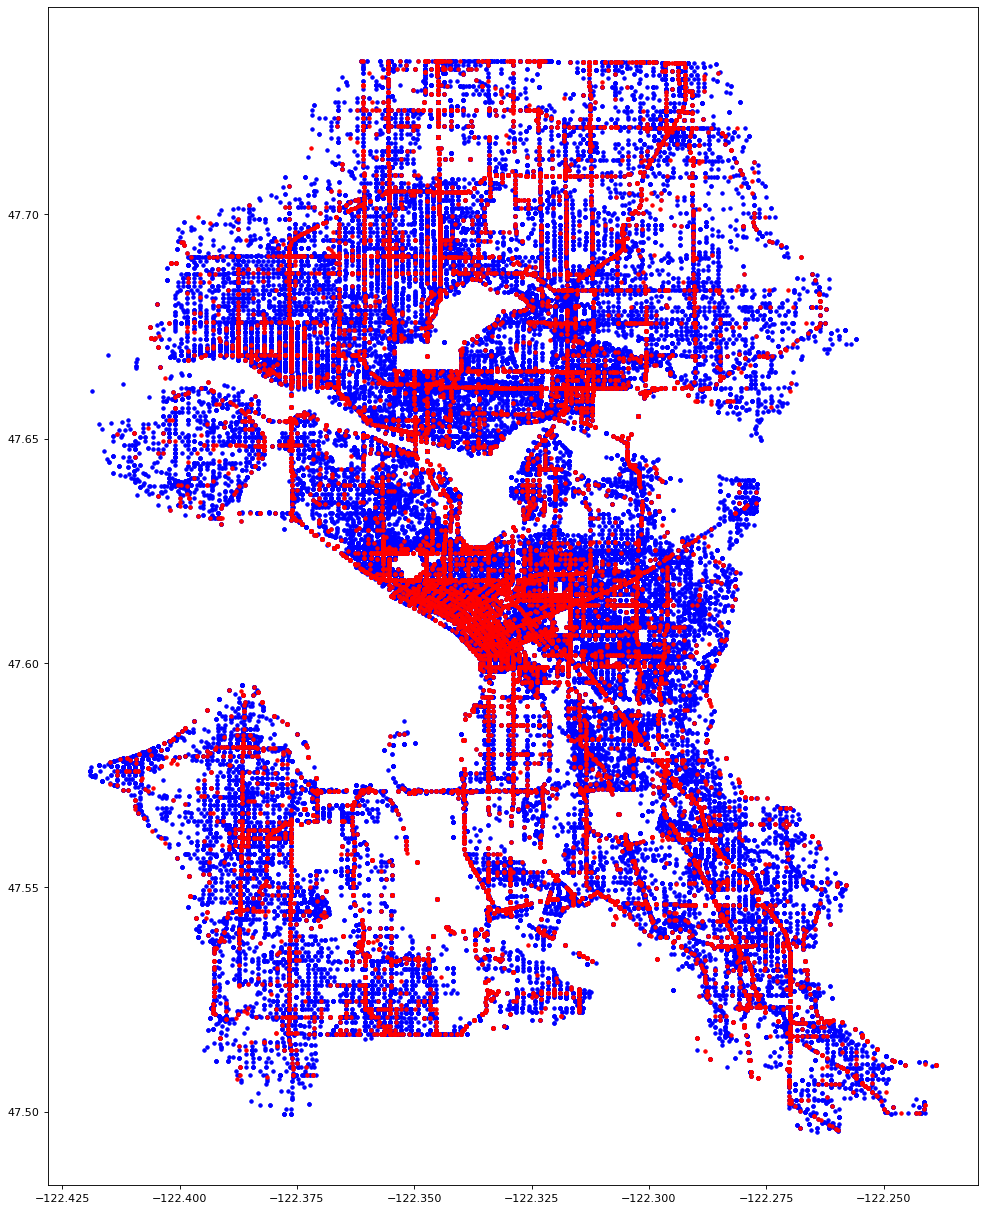

In [184]:
df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b')
plt.scatter(df_dark0['X'], df_dark0['Y'], marker='.', color = 'r')
plt.show()

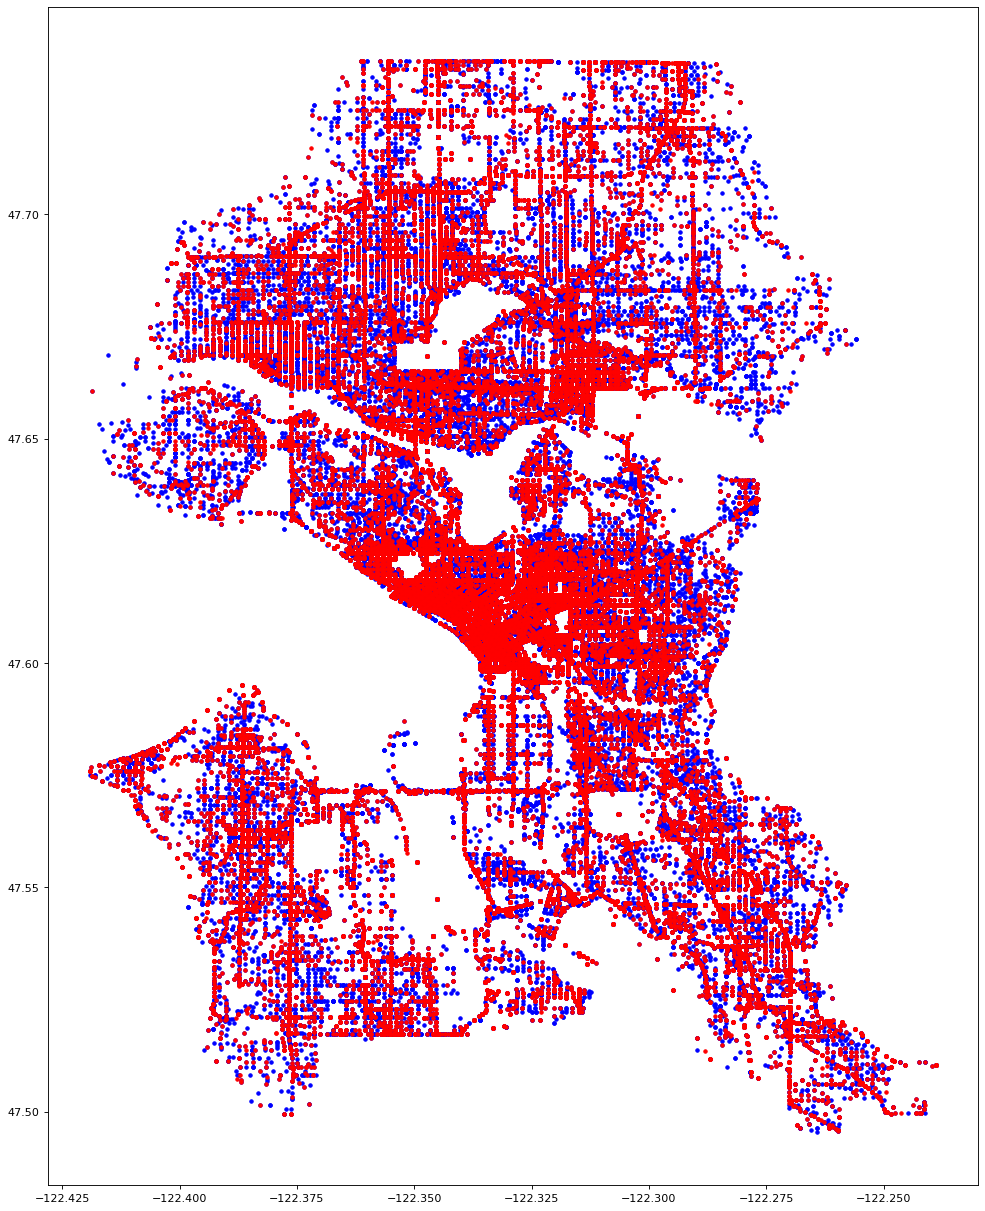

In [187]:
df_dark = df[df['LIGHTCOND'].str.contains('Dark')]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b')
plt.scatter(df_dark['X'], df_dark['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-186-ed3d2fe06ba5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark0 = df_sev2[df['ST_COLCODE'].isin([24])]


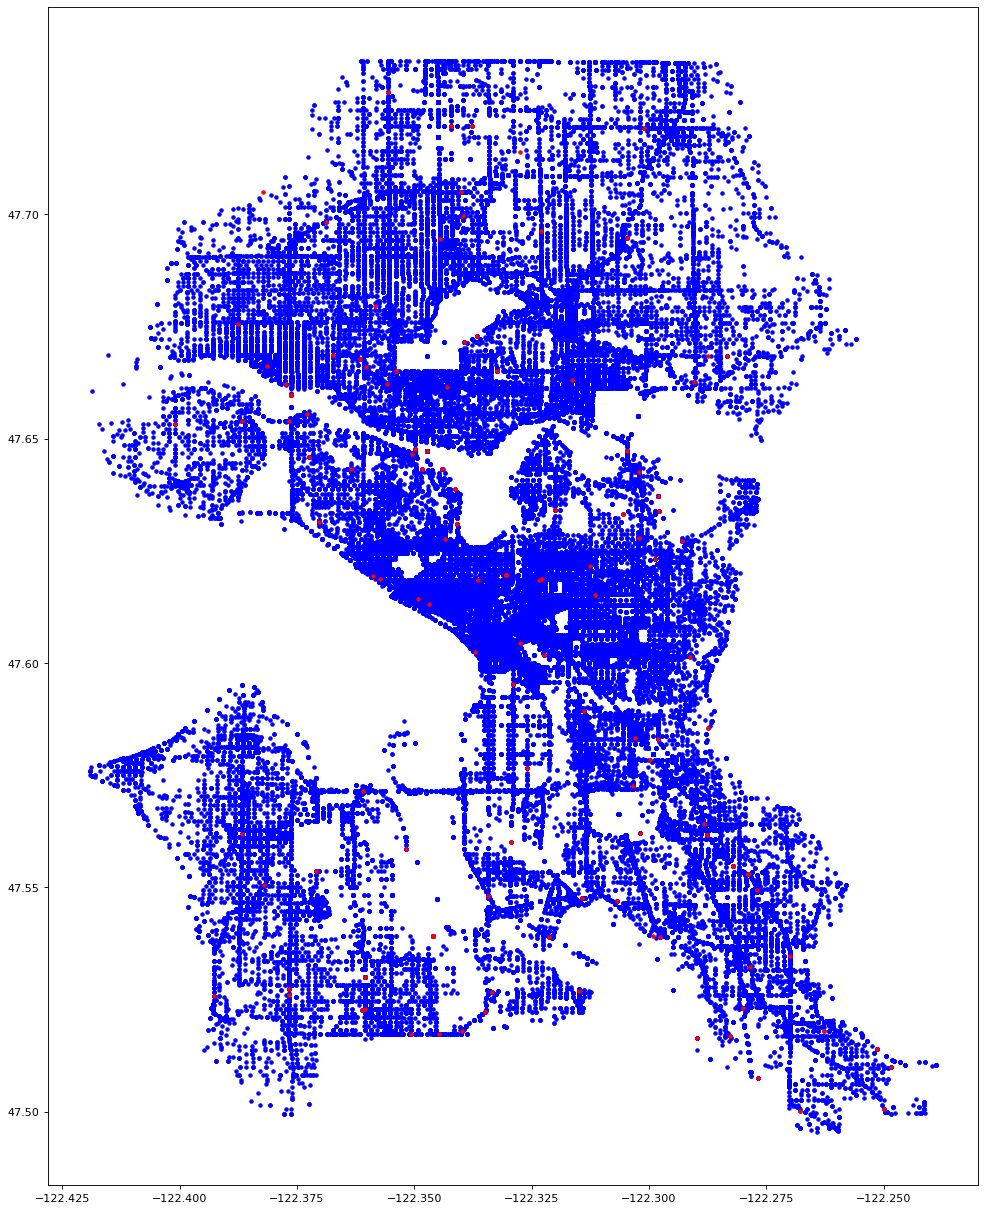

In [186]:
df_dark0 = df_sev2[df['ST_COLCODE'].isin([24])]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b')
plt.scatter(df_dark0['X'], df_dark0['Y'], marker='.', color = 'r')
plt.show()

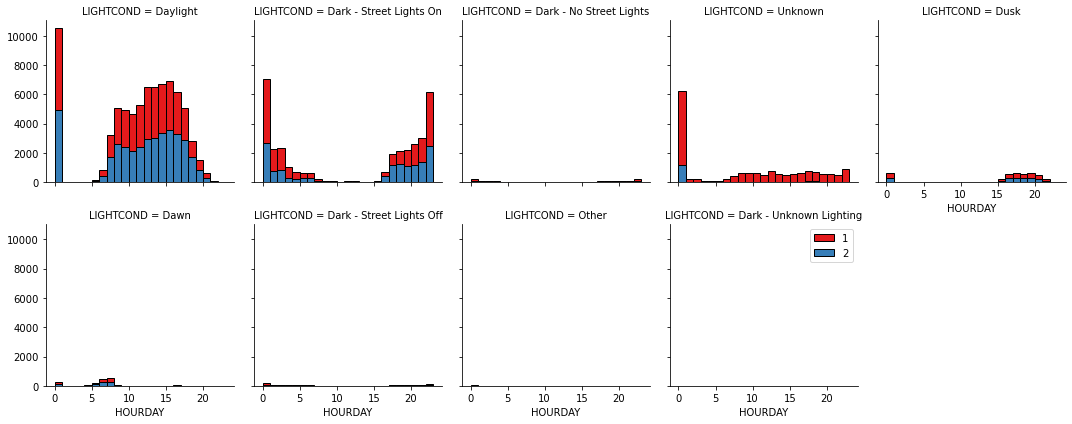

In [167]:
bins=np.linspace(df.HOURDAY.min(), df.HOURDAY.max(), 24)
g = sns.FacetGrid(df, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=5)
g.map(plt.hist, 'HOURDAY', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [176]:
for column in df.columns.values.tolist():
    if column != 'X' and column != 'Y' and column != 'INCDTTM' and column != 'SEVERITYCODE':
        for unique in df[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            if lvl2 > 66:
                print(column, unique, lvl2, n2)


PEDCOUNT 1 89.85789080029917 6007
PEDCOUNT 2 91.5929203539823 207
PEDCOUNT 3 95.45454545454545 21
PEDCOUNT 4 100.0 4
PEDCOUNT 5 100.0 1
PEDCOUNT 6 100.0 1
PEDCYLCOUNT 1 87.52067634625988 4762
PEDCYLCOUNT 2 100.0 43
SDOT_COLCODE 51 88.41463414634147 1160
SDOT_COLCODE 18 88.0798969072165 2734
SDOT_COLCODE 24 89.79748389076404 5853
SDOT_COLCODE 69 98.55072463768117 68
SDOT_COLCODE 21 77.34806629834254 140
SDOT_COLCODE 23 75.0 93
SDOT_COLCODE 29 75.36534446764091 361
SDOT_COLCODE 55 80.0 40
SDOT_COLCODE 56 89.44444444444444 161
SDOT_COLCODE 54 76.97841726618705 107
SDOT_COLCODE 44 100.0 8
SDOT_COLCODE 66 95.65217391304348 22
SDOT_COLCODE 64 96.0 72
SDOT_COLCODE 22 94.11764705882352 16
SDOT_COLCODE 58 100.0 5
SDOT_COLCODE 61 100.0 7
SDOT_COLCODE 53 77.77777777777779 7
SDOT_COLCODE 68 75.0 3
PEDROWNOTGRNT 1 90.14356117420185 4207
ST_COLCODE 5 85.57692307692307 356
ST_COLCODE 45 88.64812419146185 2741
ST_COLCODE 0 88.22055137844612 1760
ST_COLCODE 1 87.11656441717791 710
ST_COLCODE 52 76.0 38

In [173]:
for column in df.columns.values.tolist():
    if column != 'X' and column != 'Y' and column != 'INCDTTM' and column != 'SEVERITYCODE':
        for unique in df[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            if lvl2 < 33:
                print(column, unique, lvl2, n2)

ADDRTYPE Block 23.711453918030976 30096
ADDRTYPE Alley 10.918774966711052 82
ADDRTYPE Unknown 9.916926272066458 191
PEDCOUNT 0 27.6705338404338 51947
PEDCYLCOUNT 0 28.21675678818536 53383
JUNCTIONTYPE Mid-Block (not related to intersection) 21.608017817371937 19404
JUNCTIONTYPE Driveway Junction 30.30643800955862 3234
JUNCTIONTYPE Mid-Block (but intersection related) 32.018429135585784 7297
JUNCTIONTYPE At Intersection (but not related to intersection) 29.694947569113438 623
JUNCTIONTYPE Unknown 6.342694856421584 402
JUNCTIONTYPE Ramp Junction 32.53012048192771 54
SDOT_COLCODE 11 28.5627105118004 24338
SDOT_COLCODE 16 6.970185334407736 692
SDOT_COLCODE 14 32.68568481924161 17748
SDOT_COLCODE 13 3.400546821599453 199
SDOT_COLCODE 26 24.741615692891795 1173
SDOT_COLCODE 28 25.767841011743453 2282
SDOT_COLCODE 34 9.67741935483871 9
SDOT_COLCODE 0 7.2340860324920815 708
SDOT_COLCODE 12 1.875 27
SDOT_COLCODE 27 21.686746987951807 36
SDOT_COLCODE 48 10.2803738317757 11
SDOT_COLCODE 15 4.6758

In [188]:
for column in df.columns.values.tolist():
    if column != 'X' and column != 'Y' and column != 'INCDTTM' and column != 'SEVERITYCODE':
        for unique in df[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            if lvl2 > 33 and lvl2 <66:
                print(column, unique, lvl2, n2)

ADDRTYPE Intersection 42.75242047026279 27819
JUNCTIONTYPE At Intersection (intersection related) 43.26381149498488 27174
SDOT_COLCODE 52 50.0 1
INATTENTIONIND 1 34.883408824022816 10397
UNDERINFL 1 39.05273544567482 3562
WEATHER Raining 33.71850957912204 11176
WEATHER Partly Cloudy 60.0 3
ROADCOND Wet 33.186586341997725 15755
ROADCOND Oil 37.5 24
LIGHTCOND Daylight 33.18838957438198 38544
LIGHTCOND Dark - Unknown Lighting 36.36363636363637 4
SPEEDING 1 37.83349405335905 3531
ST_COLCODE 10 39.69351602851411 9299
ST_COLCODE 14 43.52307054433454 7348
ST_COLCODE 30 33.771929824561404 308
ST_COLCODE 28 45.47292418772563 3149
ST_COLCODE 13 39.19448070110013 2102
ST_COLCODE 21 33.3810888252149 233
ST_COLCODE 74 38.20224719101123 68
ST_COLCODE 66 50.0 3
ST_COLCODE 24 62.98200514138818 245
ST_COLCODE 25 38.144329896907216 37
ST_COLCODE 84 33.33333333333333 20
ST_COLCODE 10 38.45469903085267 4325
ST_COLCODE 14 45.229522952295234 4020
ST_COLCODE 13 42.01235657546337 952
ST_COLCODE 28 43.60105913

In [175]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'PEDCOUNT', 'PEDCYLCOUNT',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'HOURDAY', 'DAYWEEK',
       'MONTH'],
      dtype='object')